# 🧩 Notebook-14: Colormaps & Themes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
from pathlib import Path

# ✅ Setup utils
PROJECT_ROOT = Path.cwd().parent
UTILS_DIR = PROJECT_ROOT / "utils"
if str(UTILS_DIR) not in sys.path:
    sys.path.insert(0, str(UTILS_DIR))

from plot_utils import display_colormap_samples

print("🎨 Exploring Matplotlib-Only Colormaps and Themes")

🎨 Exploring Matplotlib-Only Colormaps and Themes


In [2]:
# 📂 1. Load Data
df = pd.read_csv(PROJECT_ROOT / "datasets" / "sales_data.csv")
df["Month"] = pd.to_datetime(df["Month"])
df["Month_Str"] = df["Month"].dt.strftime("%b")

monthly = df.groupby("Month_Str")[["Units Sold", "Revenue"]].sum()
months = monthly.index

/var/folders/23/phyj43kx4jz5gywlx6__9_kc0000gn/T/ipykernel_56565/703720935.py:8: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/satvikpraveen/Desktop/Libraries/MatplotlibMasterPro/mp_py_env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


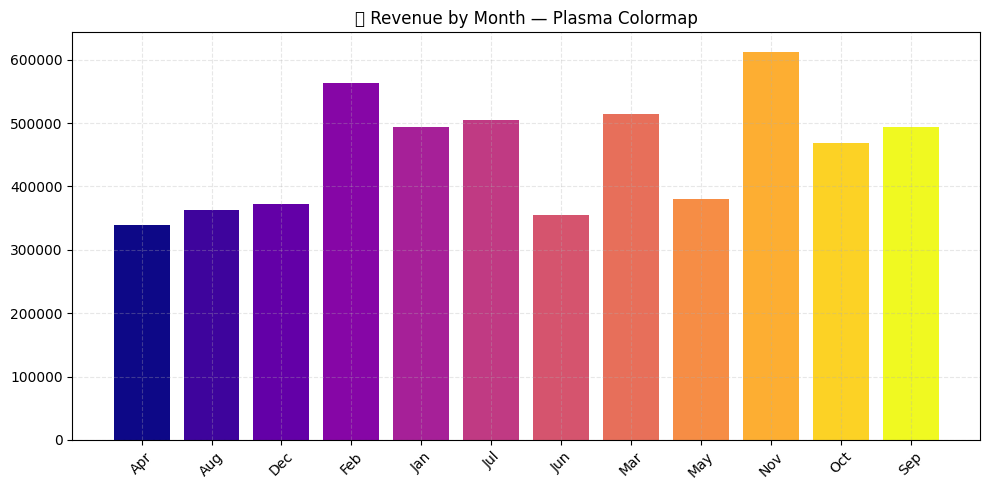

In [3]:
# 🎨 2. Sequential Colormap (Plasma)
colors = plt.cm.plasma(np.linspace(0, 1, len(months)))
plt.figure(figsize=(10, 5))
plt.bar(months, monthly["Revenue"], color=colors)
plt.title("📊 Revenue by Month — Plasma Colormap")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()

/var/folders/23/phyj43kx4jz5gywlx6__9_kc0000gn/T/ipykernel_56565/3110714853.py:10: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/satvikpraveen/Desktop/Libraries/MatplotlibMasterPro/mp_py_env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


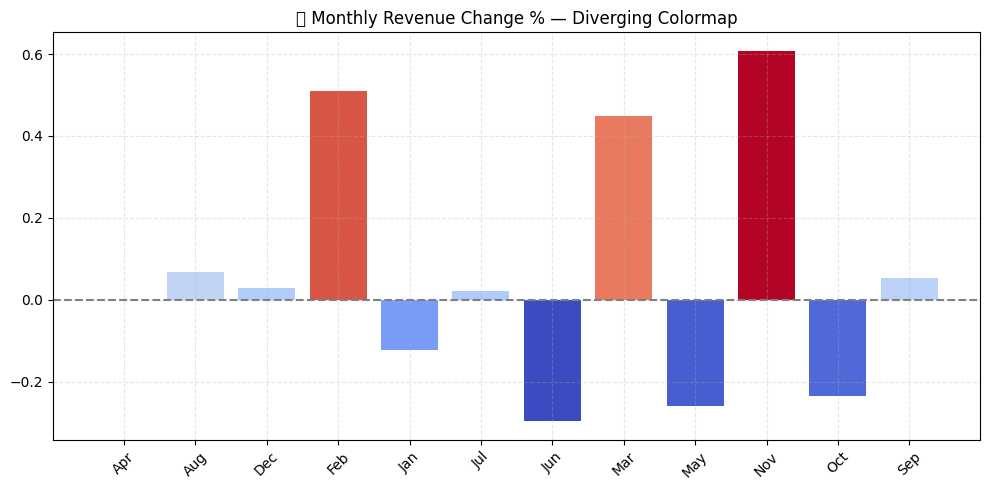

In [4]:
# 🔀 3. Diverging Colormap (coolwarm)
change = monthly["Revenue"].pct_change().fillna(0)
colors = plt.cm.coolwarm((change - change.min()) / (change.max() - change.min()))
plt.figure(figsize=(10, 5))
plt.bar(months, change, color=colors)
plt.title("🔁 Monthly Revenue Change % — Diverging Colormap")
plt.xticks(rotation=45)
plt.axhline(0, color="gray", linestyle="--")
plt.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()

/var/folders/23/phyj43kx4jz5gywlx6__9_kc0000gn/T/ipykernel_56565/2751699547.py:16: UserWarning: Glyph 127752 (\N{RAINBOW}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/satvikpraveen/Desktop/Libraries/MatplotlibMasterPro/mp_py_env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127752 (\N{RAINBOW}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


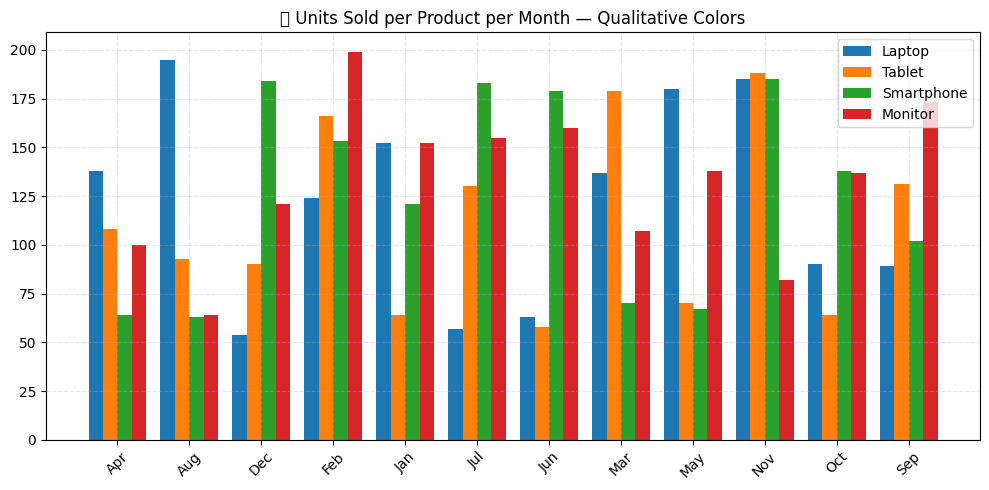

In [5]:
# 🌈 4. Qualitative Color Cycle (Matplotlib default)
plt.figure(figsize=(10, 5))
color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
product_colors = color_cycle[:4]  # assuming 4 products
width = 0.2
x = np.arange(len(months))

for i, product in enumerate(df["Product"].unique()):
    product_vals = df[df["Product"] == product].groupby("Month_Str")["Units Sold"].sum()
    plt.bar(x + i * width, product_vals.values, width=width, label=product, color=product_colors[i])

plt.title("🌈 Units Sold per Product per Month — Qualitative Colors")
plt.xticks(x + width * 1.5, months, rotation=45)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()

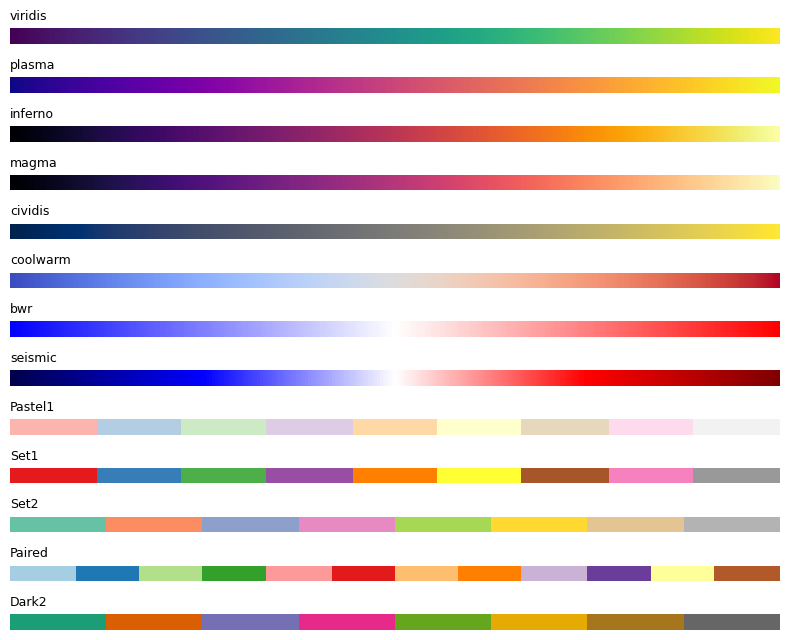

In [6]:
# 🔎 5. Display All Major Colormaps (Optional Visual Aid)
display_colormap_samples()

In [7]:
# 📦 6. Exporting Colormap-Based Plots

from plot_utils import (
    save_sequential_bar_plot,
    save_diverging_change_plot,
    save_qualitative_grouped_bar
)

# 📌 Create output folder if needed
export_dir = PROJECT_ROOT / "exports" / "colormaps_themes"
export_dir.mkdir(parents=True, exist_ok=True)

# 📁 Define output file paths
f_seq = export_dir / "revenue_colormap_sequential.png"
f_div = export_dir / "revenue_change_diverging.png"
f_qual = export_dir / "product_units_sold_qualitative.png"

# 💾 Save Plots
save_sequential_bar_plot(months, monthly["Revenue"].values, f_seq)
save_diverging_change_plot(months, change.values, f_div)
save_qualitative_grouped_bar(df, f_qual)

print(f"✅ Exported all plots to: {export_dir}")


/Users/satvikpraveen/Desktop/Libraries/MatplotlibMasterPro/utils/plot_utils.py:907: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/satvikpraveen/Desktop/Libraries/MatplotlibMasterPro/utils/plot_utils.py:908: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.savefig(filename)


✅ Exported all plots to: /Users/satvikpraveen/Desktop/Libraries/MatplotlibMasterPro/exports/colormaps_themes


/Users/satvikpraveen/Desktop/Libraries/MatplotlibMasterPro/utils/plot_utils.py:923: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/satvikpraveen/Desktop/Libraries/MatplotlibMasterPro/utils/plot_utils.py:924: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  plt.savefig(filename)
/Users/satvikpraveen/Desktop/Libraries/MatplotlibMasterPro/utils/plot_utils.py:946: UserWarning: Glyph 127752 (\N{RAINBOW}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/satvikpraveen/Desktop/Libraries/MatplotlibMasterPro/utils/plot_utils.py:947: UserWarning: Glyph 127752 (\N{RAINBOW}) missing from font(s) DejaVu Sans.
  plt.savefig(filename)


## ✅ Summary
- Showcased:
  - Sequential (`plasma`) → smooth gradient
  - Diverging (`coolwarm`) → up/down shift detection
  - Qualitative (color cycles) → categorical group clarity
- Used Matplotlib’s native `rcParams` and `cm` module
- 🔎 Optionally visualized full colormap spectrum